# Groundtrack from basic plotting function. Just using transform.

Text(0.5, 1.0, 'Cloudsat Groundtrack on April 29, 2019')

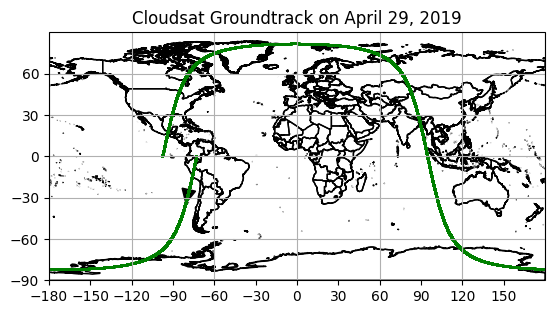

In [3]:
import cartopy
from cartopy import crs as ccrs
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import numpy as np

# Create a basic map with coastlines and gridlines.

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.gridlines()
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',scale='10m',name='admin_0_countries',edgecolor='black',facecolor='none'))

#Show latitude and longitude labels
ax.set_xticks(np.arange(-180, 180, 30), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 90, 30), crs=ccrs.PlateCarree())
# Add a marker for the location of the tile.


latitudelist= list(list(np.array(pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\CLOUDSAT DATA\Groundtracks\2019_119CloudsatLatitude.csv")).T)[0])
longitudelist=list(list(np.array(pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\CLOUDSAT DATA\Groundtracks\2019_119CloudsatLongitude.csv")).T)[0])


for i in range(len(longitudelist)):
    ax.plot(longitudelist[i],latitudelist[i],'o',color='green',markersize=1, transform=ccrs.PlateCarree())

#Arrow for the groundtrack to show the direction of the satellite
ax.arrow(longitudelist[1000],latitudelist[1000],longitudelist[2500]-longitudelist[1001],latitudelist[2500]-latitudelist[1000],head_width=10, head_length=10,color='black')


plt.title('Cloudsat Groundtrack on April 29, 2019')


#ax.plot(0, 51.53, 'o',color='red', transform=ccrs.PlateCarree()) #OK, (lon,lat) is the conventio.  (0,51.53) points to UK, so lat=51.53, long=0. Since, (x, y)=(lon,lat) is the usual convention.
# ax.plot(-5.08, 51.53, 'o',color='red', transform=ccrs.PlateCarree())
# ax.plot(-10.08, 51.53, 'o',color='red', transform=ccrs.PlateCarree())

# Test site

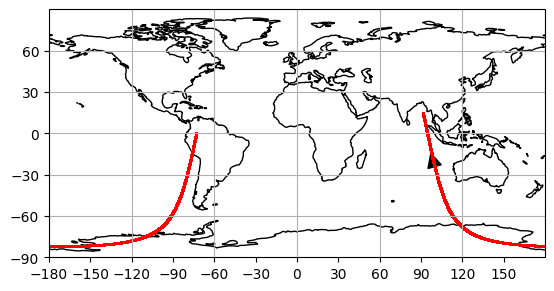

In [93]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.gridlines()
#Show latitude and longitude labels
ax.set_xticks(np.arange(-180, 180, 30), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 90, 30), crs=ccrs.PlateCarree())

for i in range(20000):
    ax.plot(longitudelist[i],latitudelist[i],'o',color='red',markersize=1, transform=ccrs.PlateCarree())

ax.arrow(longitudelist[14000],latitudelist[14000],longitudelist[16000]-longitudelist[14001],latitudelist[16000]-latitudelist[14000],head_width=10, head_length=10,color='black')


# Superimpose INSAT-3D coverage with cloudsat groundtrack

#Datapoints = 5761417, #NaN values = 2137463


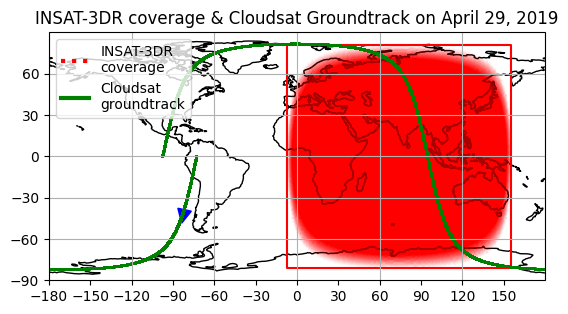

In [3]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cartopy import crs as ccrs
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore')

insatfilepath=r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\L1B data\INSAT-3DR\3RIMG_01APR2022_0015_L1B_STD_V01R00.h5"
insatfile=h5py.File(insatfilepath,'r')

cslatlist= list(list(np.array(pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\CLOUDSAT DATA\Groundtracks\2019_119CloudsatLatitude.csv")).T)[0])
cslonlist=list(list(np.array(pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\CLOUDSAT DATA\Groundtracks\2019_119CloudsatLongitude.csv")).T)[0])

inleftlon=insatfile.attrs['left_longitude'][0]
inrightlon=insatfile.attrs['right_longitude'][0]
intoplat=insatfile.attrs['upper_latitude'][0]
inbottomlat=insatfile.attrs['lower_latitude'][0]

#Create a basic map with coastlines and gridlines.

ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
ax.gridlines()
#ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',scale='10m',name='admin_0_countries',edgecolor='black',facecolor='none'))
ax.set_xticks(np.arange(-180, 180, 30), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 90, 30), crs=ccrs.PlateCarree())

#Create a box around the INSAT-3DR image

inlat=insatfile['Latitude']
inlon=insatfile['Longitude']
inlat=np.ma.masked_greater_equal(inlat,32767)/100 #Change it to 32767 later
inlon=np.ma.masked_greater_equal(inlon,32767)/100 #Change it to 32767 later

#ax.plot([inleftlon,inrightlon,inrightlon,inleftlon,inleftlon],[intoplat,intoplat,inbottomlat,inbottomlat,intoplat],color='red',transform=ccrs.PlateCarree())
ax.plot([inleftlon,inrightlon,inrightlon,inleftlon,inleftlon],[intoplat,intoplat,inbottomlat,inbottomlat,intoplat],color='red',transform=ccrs.PlateCarree()) 

#Fill the box with a light red color corresponding to the INSAT-3DR image non-NaN values
#ax.fill([inleftlon,inrightlon,inrightlon,inleftlon,inleftlon],[intoplat,intoplat,inbottomlat,inbottomlat,intoplat],'b',alpha=0.1,transform=ccrs.PlateCarree())
ax.plot(inlon,inlat,'o',color='red',alpha=0.01, markersize=1, transform=ccrs.PlateCarree());

print("#Datapoints = {}, #NaN values = {}".format(np.ma.count(inlat),np.ma.count_masked(inlat)))

#Adding the Cloudsat groundtrack

for i in range(len(cslonlist)):
    ax.plot(cslonlist[i],cslatlist[i],'o',color='green',markersize=1, transform=ccrs.PlateCarree())

ax.arrow(cslonlist[2000],cslatlist[2000],cslonlist[2000]-cslonlist[0],cslatlist[2000]-cslatlist[0],head_width=10, head_length=10,color='blue') #Adding arrow for satellite direction

#Adding labels for both the satellites

colors = ['red', 'green']
style=['dotted','solid']
lines=[]
for i in range(len(colors)):
    lines.append(Line2D([0], [0], color=colors[i], linewidth=3, linestyle=style[i]))
labels = ['INSAT-3DR\ncoverage', 'Cloudsat\ngroundtrack']
plt.legend(lines, labels)

plt.title('INSAT-3DR coverage & Cloudsat Groundtrack on April 29, 2019')
plt.show()

In [30]:
inlat=insatfile['Latitude']
inlat=np.ma.masked_equal(inlat,32767)/100
inlon=insatfile['Longitude']
inlon=np.ma.masked_equal(inlon,32767)/100


In [85]:
inlat=insatfile['Latitude']
inlon=insatfile['Longitude']
inlat=np.ma.masked_greater_equal(inlat,-2000)/100 #Change it to 32767 later
inlon=np.ma.masked_greater_equal(inlon,5041)/100 #Change it to 32767 later

np.ma.count(inlat),np.ma.count(inlon), np.ma.count_masked(inlat),np.ma.count_masked(inlon)

(1507821, 1507055, 6391059, 6391825)

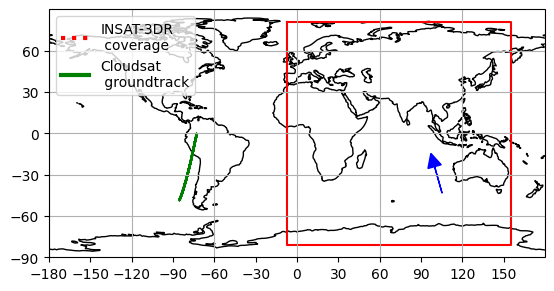

In [5]:
from matplotlib.lines import Line2D

ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
ax.gridlines()
#ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',scale='10m',name='admin_0_countries',edgecolor='black',facecolor='none'))
ax.set_xticks(np.arange(-180, 180, 30), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 90, 30), crs=ccrs.PlateCarree())

ax.plot([inleftlon,inrightlon,inrightlon,inleftlon,inleftlon],[intoplat,intoplat,inbottomlat,inbottomlat,intoplat],color='red',transform=ccrs.PlateCarree()) 

#Fill the box with a light blue color

#ax.fill([inleftlon,inrightlon,inrightlon,inleftlon,inleftlon],[intoplat,intoplat,inbottomlat,inbottomlat,intoplat],'b',alpha=0.1,transform=ccrs.PlateCarree())
#ax.plot(inlon,inlat,'o',color='red',alpha=0.03, markersize=1, transform=ccrs.PlateCarree());

for i in range(5000):
    ax.plot(cslonlist[i],cslatlist[i],'o',color='green',markersize=0.1, transform=ccrs.PlateCarree())

ax.arrow(cslonlist[14000],cslatlist[14000],cslonlist[16000]-cslonlist[14001],cslatlist[16000]-cslatlist[14000],head_width=10, head_length=10,color='blue')

colors = ['red', 'green']
style=['dotted','solid']
lines=[]
for i in range(len(colors)):
    lines.append(Line2D([0], [0], color=colors[i], linewidth=3, linestyle=style[i]))
labels = ['INSAT-3DR\n coverage', 'Cloudsat\n groundtrack']
plt.legend(lines, labels)
plt.show()

#Datapoints = 5761417, #NaN values = 2137463


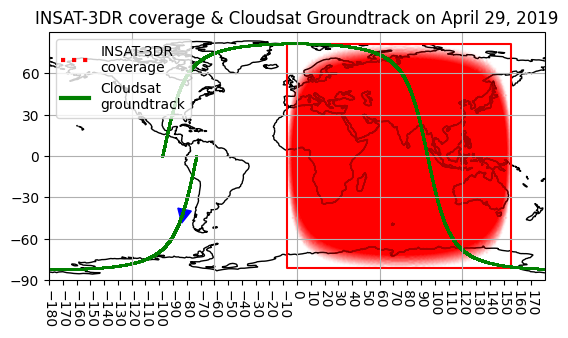

In [9]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cartopy import crs as ccrs
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore')

insatfilepath=r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\L1B data\INSAT-3DR\3RIMG_01APR2022_0015_L1B_STD_V01R00.h5"
insatfile=h5py.File(insatfilepath,'r')

cslatlist= list(list(np.array(pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\CLOUDSAT DATA\Groundtracks\2019_119CloudsatLatitude.csv")).T)[0])
cslonlist=list(list(np.array(pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\CLOUDSAT DATA\Groundtracks\2019_119CloudsatLongitude.csv")).T)[0])

inleftlon=insatfile.attrs['left_longitude'][0]
inrightlon=insatfile.attrs['right_longitude'][0]
intoplat=insatfile.attrs['upper_latitude'][0]
inbottomlat=insatfile.attrs['lower_latitude'][0]

#Create a basic map with coastlines and gridlines.

ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
ax.gridlines()
#ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',scale='10m',name='admin_0_countries',edgecolor='black',facecolor='none'))
ax.set_xticks(np.arange(-180, 180, 10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 90, 30), crs=ccrs.PlateCarree())
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-90 );

#Create a box around the INSAT-3DR image

inlat=insatfile['Latitude']
inlon=insatfile['Longitude']
inlat=np.ma.masked_greater_equal(inlat,32767)/100 #Change it to 32767 later
inlon=np.ma.masked_greater_equal(inlon,32767)/100 #Change it to 32767 later

#ax.plot([inleftlon,inrightlon,inrightlon,inleftlon,inleftlon],[intoplat,intoplat,inbottomlat,inbottomlat,intoplat],color='red',transform=ccrs.PlateCarree())
ax.plot([inleftlon,inrightlon,inrightlon,inleftlon,inleftlon],[intoplat,intoplat,inbottomlat,inbottomlat,intoplat],color='red',transform=ccrs.PlateCarree()) 

#Fill the box with a light red color corresponding to the INSAT-3DR image non-NaN values
#ax.fill([inleftlon,inrightlon,inrightlon,inleftlon,inleftlon],[intoplat,intoplat,inbottomlat,inbottomlat,intoplat],'b',alpha=0.1,transform=ccrs.PlateCarree())
ax.plot(inlon,inlat,'o',color='red',alpha=0.01, markersize=1, transform=ccrs.PlateCarree());

print("#Datapoints = {}, #NaN values = {}".format(np.ma.count(inlat),np.ma.count_masked(inlat)))

#Adding the Cloudsat groundtrack

for i in range(len(cslonlist)):
    ax.plot(cslonlist[i],cslatlist[i],'o',color='green',markersize=1, transform=ccrs.PlateCarree())

ax.arrow(cslonlist[2000],cslatlist[2000],cslonlist[2000]-cslonlist[0],cslatlist[2000]-cslatlist[0],head_width=10, head_length=10,color='blue') #Adding arrow for satellite direction

#Adding labels for both the satellites

colors = ['red', 'green']
style=['dotted','solid']
lines=[]
for i in range(len(colors)):
    lines.append(Line2D([0], [0], color=colors[i], linewidth=3, linestyle=style[i]))
labels = ['INSAT-3DR\ncoverage', 'Cloudsat\ngroundtrack']
plt.legend(lines, labels)

plt.title('INSAT-3DR coverage & Cloudsat Groundtrack on April 29, 2019')
plt.show()

In [2]:
import h5py
insatfilepath=r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\L1B data\INSAT-3DR\3RIMG_01APR2022_0015_L1B_STD_V01R00.h5"
insatfile=h5py.File(insatfilepath,'r')

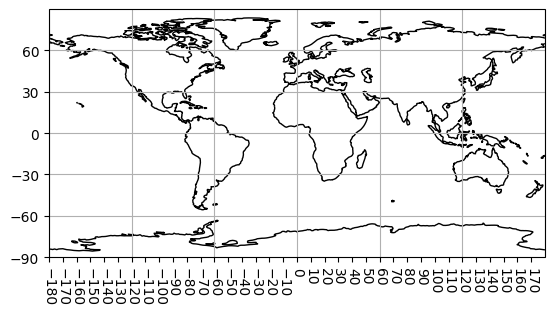

In [8]:
ax=plt.axes(projection=ccrs.PlateCarree())

ax.set_global()
ax.set_xticks(np.arange(-180, 180, 10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 90, 30), crs=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-90 );

In [10]:
pip list

Package           Version   Editable project location
----------------- --------- ---------------------------------------------------------
asttokens         2.1.0
backcall          0.2.0
basemap           1.3.6
basemap-data      1.3.2
Cartopy           0.20.2
certifi           2022.9.24
cftime            1.6.2
colorama          0.4.6
contourpy         1.0.6
csat              0.0.1     C:\Users\HP\OneDrive\Desktop\Python\Cloudsat project\csat
cycler            0.11.0
Cython            0.29.32
debugpy           1.6.3
decorator         5.1.1
entrypoints       0.4
executing         1.2.0
fonttools         4.38.0
geographiclib     2.0
geopy             2.3.0
global-land-mask  1.0.0
h5py              3.7.0
ipykernel         6.17.1
ipython           8.6.0
jedi              0.18.2
jupyter_client    7.4.7
jupyter_core      5.0.0
kiwisolver        1.4.4
matplotlib        3.5.2
matplotlib-inline 0.1.6
nest-asyncio      1.5.6
netCDF4           1.6.2
numpy             1.23.5
packaging         21.3